# PRICE CHANGES

In [3]:
import pandas as pd
df = pd.read_csv("pivot_enerji.csv", sep="|", header=None, skiprows=4)

df

,0,1,2,3,4
0,2005.0,01-Ocak,0441001. (Su Faturası),2.2301,NaN
1,NaN,NaN,0451001. (Elektrik Ücreti),0.1600,NaN
2,NaN,NaN,0452101. (Doğal Gaz),0.4100,NaN
3,NaN,NaN,0830009. (İnternet Ücreti),13.6864,NaN
4,NaN,02-Şubat,0441001. (Su Faturası),2.2301,NaN
...,...,...,...,...,...
820,NaN,02-Şubat,0441001. (Su Faturası),7.3412,NaN
821,NaN,NaN,0451001. (Elektrik Ücreti),1.4809,NaN
822,NaN,NaN,0452101. (Doğal Gaz),2.8851,NaN
823,NaN,NaN,0830009. (İnternet Ücreti),77.5432,NaN


In [ ]:
pip install pandas-profiling

In [4]:
import sys
import pandas_profiling
import re

# Column Renaming
cols = ["Year", "Month", "Product", "Price", "Extra"]
df.columns = cols

# Drop useless column
df.drop(axis=1, columns=["Extra"], inplace=True)

# Fill NA cells wit previous filled value
df = df.fillna(method="ffill")

# Data Cleaning Regex Pattern
pattern = r".*\((.*)\)+"
df["Product"] = df["Product"].apply(lambda x: re.search(pattern, x).group(1))
df["Product"] = df["Product"].apply(lambda x: x.replace(")", ""))

df["Year"] = df["Year"].astype(int)
df["Month"] = df["Month"].apply(lambda x: int(str(x)[:2]))

pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

----------------------------------------------------------------------

Data Transpose & Correlation

In [5]:
df_pivot = df.pivot_table("Price", ["Year", "Month"], "Product")
df_pivot

Product     Doğal Gaz  Elektrik Ücreti  Su Faturası  İnternet Ücreti
Year Month                                                          
2005 1         0.4100           0.1600       2.2301          13.6864
     2         0.4100           0.1600       2.2301          13.6917
     3         0.4300           0.1600       2.2301          13.6917
     4         0.4300           0.1600       2.2301          13.9496
     5         0.4300           0.1600       2.0411          14.2074
...               ...              ...          ...              ...
2021 10        2.2567           0.9172       7.3848          73.7116
     11        2.2641           0.9172       7.3848          74.5960
     12        2.2893           0.9172       7.3848          75.3537
2022 1         2.7788           1.5562       7.5675          76.2700
     2         2.8851           1.4809       7.3412          77.5432

[206 rows x 4 columns]

In [6]:
corr = df_pivot.corr()

print(corr.unstack())
corr

Product          Product        
Doğal Gaz        Doğal Gaz          1.000000
                 Elektrik Ücreti    0.974216
                 Su Faturası        0.868787
                 İnternet Ücreti    0.399489
Elektrik Ücreti  Doğal Gaz          0.974216
                 Elektrik Ücreti    1.000000
                 Su Faturası        0.848145
                 İnternet Ücreti    0.325751
Su Faturası      Doğal Gaz          0.868787
                 Elektrik Ücreti    0.848145
                 Su Faturası        1.000000
                 İnternet Ücreti    0.348294
İnternet Ücreti  Doğal Gaz          0.399489
                 Elektrik Ücreti    0.325751
                 Su Faturası        0.348294
                 İnternet Ücreti    1.000000
dtype: float64


Product,Doğal Gaz,Elektrik Ücreti,Su Faturası,İnternet Ücreti
Product,,,,
Doğal Gaz,1.000000,0.974216,0.868787,0.399489
Elektrik Ücreti,0.974216,1.000000,0.848145,0.325751
Su Faturası,0.868787,0.848145,1.000000,0.348294
İnternet Ücreti,0.399489,0.325751,0.348294,1.000000


In [ ]:
pip3 install PyQt5

Product          Product        
Doğal Gaz        Doğal Gaz          1.000000
Elektrik Ücreti  Elektrik Ücreti    1.000000
Su Faturası      Su Faturası        1.000000
İnternet Ücreti  İnternet Ücreti    1.000000
Doğal Gaz        Elektrik Ücreti    0.974216
Elektrik Ücreti  Doğal Gaz          0.974216
Doğal Gaz        Su Faturası        0.868787
Su Faturası      Doğal Gaz          0.868787
Elektrik Ücreti  Su Faturası        0.848145
Su Faturası      Elektrik Ücreti    0.848145
Doğal Gaz        İnternet Ücreti    0.399489
İnternet Ücreti  Doğal Gaz          0.399489
Su Faturası      İnternet Ücreti    0.348294
İnternet Ücreti  Su Faturası        0.348294
Elektrik Ücreti  İnternet Ücreti    0.325751
İnternet Ücreti  Elektrik Ücreti    0.325751
dtype: float64

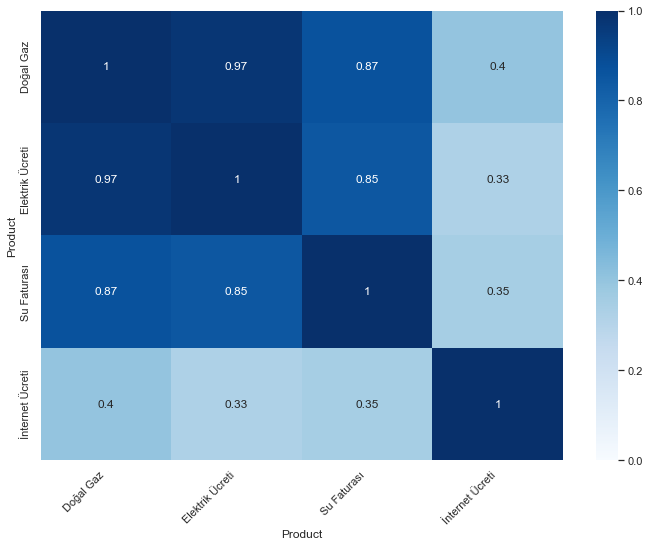

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(rc={"figure.figsize":(11.7,8.27)})

corr = df_pivot.corr()
ax = sns.heatmap(
    corr,
    cmap = "Blues",
    vmax = 1,
    vmin = 0,
    center = 0.5,
    annot = True,
)

ax.set_xticklabels(corr.index, horizontalalignment = "right", rotation = 45)

stack = corr.unstack()
stack.sort_values(kind="quicksort", ascending=False)

----------------------------------------------------------------------

Time Series

In [8]:
df = df.loc[df["Product"] == "Elektrik Ücreti"]
df

,Year,Month,Product,Price
1,2005,1,Elektrik Ücreti,0.1600
5,2005,2,Elektrik Ücreti,0.1600
9,2005,3,Elektrik Ücreti,0.1600
13,2005,4,Elektrik Ücreti,0.1600
17,2005,5,Elektrik Ücreti,0.1600
...,...,...,...,...
805,2021,10,Elektrik Ücreti,0.9172
809,2021,11,Elektrik Ücreti,0.9172
813,2021,12,Elektrik Ücreti,0.9172
817,2022,1,Elektrik Ücreti,1.5562


In [9]:
import datetime

def date_mapping(row):
    return datetime.date(row["Year"], row["Month"], 1)

In [10]:
import pandas as pd
import datetime
pd.options.mode.chained_assignment = None

df["Date"] = df.apply(lambda x: date_mapping(x), axis=1)
df_sub = df[["Date", "Price"]].reset_index(drop=True)
df_sub.head()

,Date,Price
0,2005-01-01,0.16
1,2005-02-01,0.16
2,2005-03-01,0.16
3,2005-04-01,0.16
4,2005-05-01,0.16


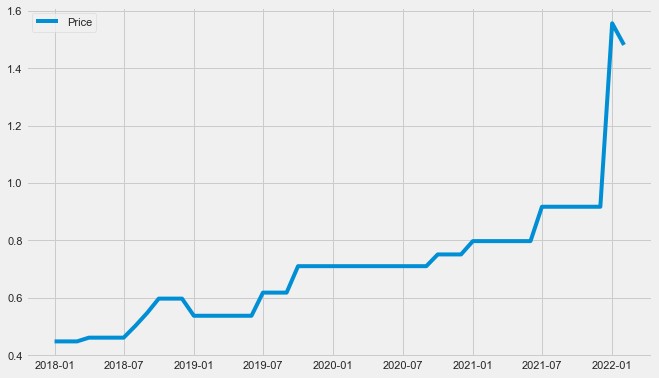

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("fivethirtyeight")
pd.plotting.register_matplotlib_converters()
fig = plt.figure(figsize=(10,6))
df_sub2 = df[df["Year"] >= 2018].reset_index(drop=True)
df_sub2["Date"] = df_sub2.apply(lambda x: date_mapping(x), axis=1)
plt.plot(df_sub2.Date, df_sub2.Price)

plt.legend(["Price"])

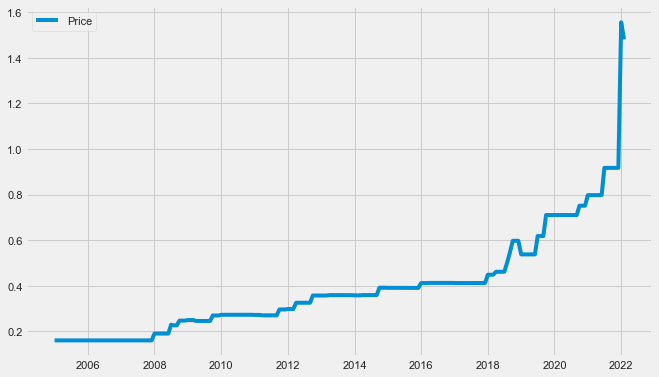

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use("fivethirtyeight")
pd.plotting.register_matplotlib_converters()

plt.figure(figsize=(10,6))
plt.plot(df_sub.set_index("Date"))
plt.legend(["Price"])

----------------------------------------------------------------------

Prophet Predictions

In [ ]:
conda install pystan

In [ ]:
pip install --upgrade plotly

In [13]:
from fbprophet import Prophet
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [19]:
from fbprophet import Prophet
df_sub.columns = ["ds", "y"]

m = Prophet(
    #holidays=pd.DataFrame(columns=["ds", "holiday"]),
    seasonality_mode="multiplicative",
    interval_width=0.95,
    mcmc_samples=300)

try:
    m.add_country_holidays(country_name="TR") #TR no supported
except:
    None
    
m = m.fit(df_sub, control={'max_treedepth': 15})
future = m.make_future_dataframe(periods=120, freq="M")
fcst = m.predict(future)
fcst

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Commemoration of Ataturk,Commemoration of Ataturk_lower,Commemoration of Ataturk_upper,Democracy and National Unity Day,...,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
0,2005-01-01,0.029327,0.064045,0.291333,0.018315,0.043426,0.0,0.0,0.0,0.0,...,5.285492,3.253431,7.537199,-22.340829,-33.667820,-4.386879,0.0,0.0,0.0,0.184335
1,2005-02-01,0.029404,0.051502,0.289614,0.018683,0.043090,0.0,0.0,0.0,0.0,...,5.060652,3.118974,7.267342,5.060652,3.118974,7.267342,0.0,0.0,0.0,0.178205
2,2005-03-01,0.029473,0.040393,0.269802,0.019070,0.042544,0.0,0.0,0.0,0.0,...,4.171504,2.583900,5.883130,4.171504,2.583900,5.883130,0.0,0.0,0.0,0.152418
3,2005-04-01,0.029549,0.028681,0.258031,0.019365,0.042557,0.0,0.0,0.0,0.0,...,4.123558,2.500218,5.887442,4.123558,2.500218,5.887442,0.0,0.0,0.0,0.151397
4,2005-05-01,0.029623,0.035681,0.249374,0.019628,0.042801,0.0,0.0,0.0,0.0,...,4.071802,2.539433,5.789626,-19.165277,-32.529222,-6.015721,0.0,0.0,0.0,0.150244
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,2031-09-30,0.484793,1.326619,4.698664,0.207159,0.813992,0.0,0.0,0.0,0.0,...,4.964283,2.789567,8.227678,4.964283,2.789567,8.227678,0.0,0.0,0.0,2.891445
322,2031-10-31,0.487332,1.217296,4.667115,0.207040,0.821423,0.0,0.0,0.0,0.0,...,4.828717,2.780312,7.151991,4.828717,2.780312,7.151991,0.0,0.0,0.0,2.840519
323,2031-11-30,0.489788,1.170887,4.522240,0.207323,0.828977,0.0,0.0,0.0,0.0,...,4.591112,2.497750,6.784590,4.591112,2.497750,6.784590,0.0,0.0,0.0,2.738461
324,2031-12-31,0.492327,-20.052979,-2.111338,0.208750,0.834641,0.0,0.0,0.0,0.0,...,-23.185314,-35.032180,-4.559230,-23.185314,-35.032180,-4.559230,0.0,0.0,0.0,-10.922423


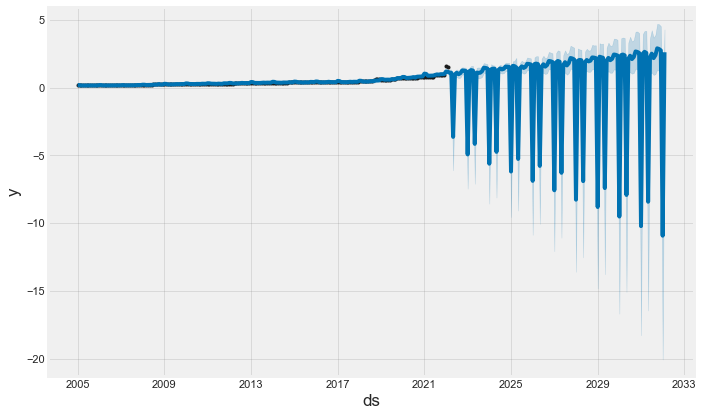

In [20]:
pltl = m.plot(fcst)

C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)
C:\ProgramData\Anaconda3\lib\site-packages\fbprophet\plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


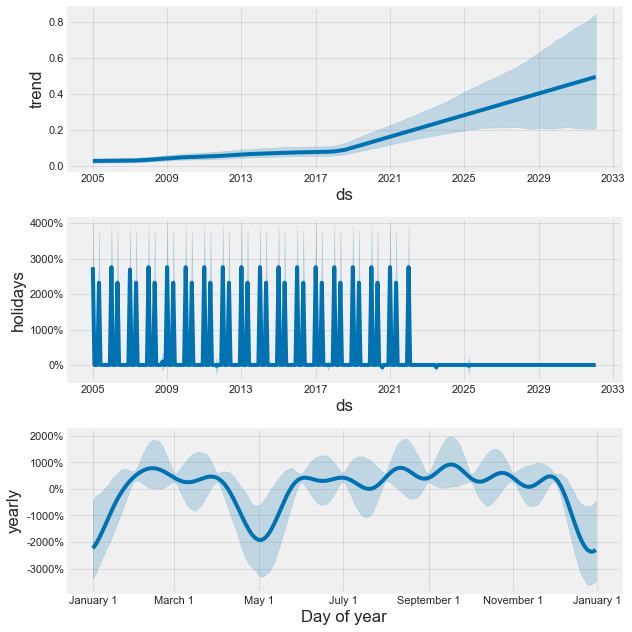

In [21]:
comps = m.plot_components(fcst)

In [22]:
preds = fcst
preds["Year"] = preds["ds"].apply(lambda x: x.year)
preds["Month"] = preds["ds"].apply(lambda x: x.month)

preds.loc[(preds["Year"] == 2020)].T

,180,181,182,183,184,185,186,187,188,189,190,191
ds,2020-01-01 00:00:00,2020-02-01 00:00:00,2020-03-01 00:00:00,2020-04-01 00:00:00,2020-05-01 00:00:00,2020-06-01 00:00:00,2020-07-01 00:00:00,2020-08-01 00:00:00,2020-09-01 00:00:00,2020-10-01 00:00:00,2020-11-01 00:00:00,2020-12-01 00:00:00
trend,0.133512,0.136051,0.138425,0.140964,0.14342,0.145959,0.148415,0.150954,0.153492,0.155949,0.158487,0.160943
yhat_lower,0.640373,0.641863,0.572134,0.568479,0.585165,0.600138,0.627176,0.556731,0.663238,0.661918,0.675312,0.676717
yhat_upper,0.888971,0.878712,0.807793,0.816598,0.821841,0.842189,0.875592,0.847191,0.912755,0.909827,0.922423,0.921868
trend_lower,0.097729,0.099623,0.101396,0.103293,0.10513,0.107005,0.10886,0.110711,0.112551,0.114418,0.116278,0.117994
trend_upper,0.188712,0.191961,0.195001,0.19825,0.201394,0.204644,0.207853,0.211236,0.214619,0.217892,0.221275,0.224549
Commemoration of Ataturk,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Commemoration of Ataturk_lower,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Commemoration of Ataturk_upper,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Democracy and National Unity Day,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
